### **3 - Analisis de normalidad con python**

#### **`Ejemplos`**

##### **Ejemplo 1 - Distribucion real/normal y Funcion de densidad real/normalizada**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años.

In [3]:
datos = datos[(datos.age > 15) & (datos.male == 0)]
peso = datos['weight']
peso

1      36.485807
2      31.864838
4      41.276872
6      38.243476
8      34.869885
         ...    
529    39.405805
533    40.823280
534    47.031821
537    34.246196
541    54.062497
Name: weight, Length: 198, dtype: float64

In [4]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso)

print(mu)
print(sigma)

41.38615752272728
5.737813252284781


In [5]:
# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso), max(peso), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

**FORMA 1**

Histograma con datos reales y funcion de densidad normalizada

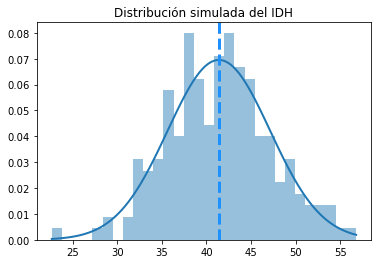

In [8]:
# Gráfico
plt.plot(x_hat, y_hat, linewidth=2, label='normal')
plt.hist(peso, density=True, bins=30, color="#3182bd", alpha=0.5)

plt.axvline(mu, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.6)

**FORMA 2**

- Histograma con datos reales y funcion de densidad real
- Histograma con datos normalizados y funcion de densidad normalizada

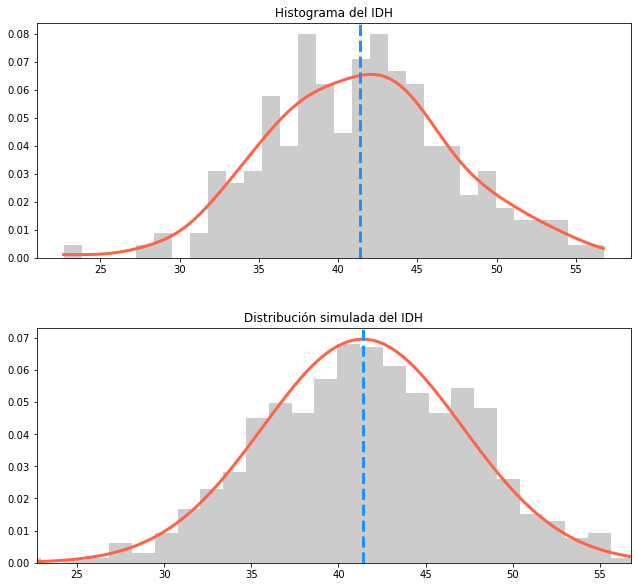

In [7]:
###################################################################
# Datos reales

# Generamos el primer espacio para el primer histograma
plt.subplot(2,1,1)

plt.hist(peso, bins= 30, color='grey', alpha=.4, density=True) 

gauss_kde = stats.gaussian_kde(peso) # Kernel gaussiano 
z = np.reshape(gauss_kde(x_hat), x_hat.shape) 

plt.plot(x_hat, z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media 
plt.axvline(peso.mean(), color='dodgerblue', linestyle='--', lw=3) 
plt.title("Histograma del IDH")
plt.subplots_adjust(hspace=0.6, top=2, right=1.5)

###################################################################
# Datos normalizados

# El segundo gráfico 
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal
datos_normal = np.random.normal(mu, sigma, 1000)

plt.hist(datos_normal, bins=30, color='grey', alpha=.4, density=True)

# Fijamos los límites del eje x 
plt.xlim(min(peso), max(peso))

# Generamos una lista entre:
x_axis = np.linspace(min(peso), max(peso), 1000)
y_axis = stats.norm.pdf(x_axis, mu, sigma)

plt.plot(x_hat, y_hat, color='tomato', lw=3)
plt.axvline(mu, color='dodgerblue', linestyle='--', lw=3) 
plt.title("Distribución simulada del IDH") 
plt.subplots_adjust(hspace=0.3)

##### **Ejemplo 2 - Distribucion real y Funcion de densidad normalizada**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Supongamos que tenemos 1000 datos que siguen una distribución normal de media 10 y de desviación estándar 2. Estos datos saldrían de haberlos medido en algún proceso, pero para simplificar voy a generarlos con python.

In [ ]:
data = np.random.normal(loc=10, scale=2, size=1000)

Al ejecutarlo me sale que la muestra tiene media 9.957369201658272 y desviación 1.9783697744791475. Pero si lo ejecuto otra vez podrá salir otra cosa. Si la muestra tuviera infinitos elementos, la media sería 10 y la desviación 2.

In [ ]:
print(np.mean(data), np.std(data))

9.957369201658272 1.9783697744791475


In [ ]:
mu, sigma = stats.norm.fit(data)

print(mu)
print(sigma)

9.957369201658272
1.9783697744791475


Puedo pintar el histograma de esta muestra:

(array([  8.,  24.,  70., 169., 194., 231., 169.,  98.,  32.,   5.]),
 array([ 3.81815659,  5.02095882,  6.22376105,  7.42656328,  8.6293655 ,
         9.83216773, 11.03496996, 12.23777218, 13.44057441, 14.64337664,
        15.84617886]),
 <BarContainer object of 10 artists>)

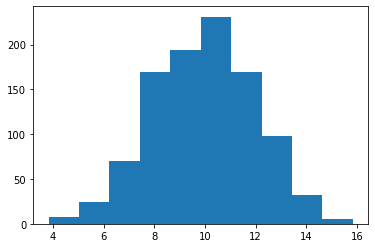

In [ ]:
plt.hist(data)

Ahora puedo usar **`scipy.stat.norm`** para crear una distribución normal continua con los parámetros que extraje de la muestra (observa que no son los "verdaderos" parámetros, pues esos nos son desconocidos en un caso real):

Para que sean comparables, el histograma debe estar normalizado (la suma de todas las barras debe dar 1 y no 1000 como en el caso anterior), lo cual se logra pasando el parámetro normed=True a la función hist.

Por otro lado, para pintar el pdf, ya que esa curva es infinita, debemos elegir un valor mínimo y uno máximo en el eje x. Podemos elegir por ejemplo representar entre el percentil 0.001 y el 0.999 (y tomar 100 puntos para hacer esa gráfica)

In [ ]:
min = stats.norm.ppf(0.001, mu, sigma)
min

3.8437470110168794

In [ ]:
max = stats.norm.ppf(0.999, mu, sigma)
max

16.070991392299664

In [ ]:
x_axis = np.linspace(min, max, num=100)
y_axis = stats.norm.pdf(x_axis, mu, sigma)

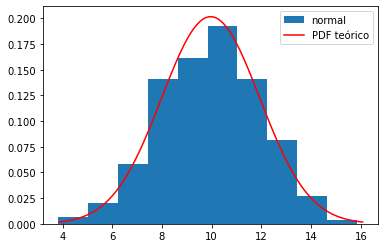

In [ ]:
plt.hist(data, density=True, linewidth=2, label='normal')
plt.plot(x_axis, y_axis, "r-", label="PDF teórico")
plt.legend()